### Task required to be performed on dataset
Assignment

There are two csv files that represent student response data for the years 2021 and 2022. The columns of the csv files are:

student_id

question_id

ability - The ability skill of the student.

difficulty - The difficulty of the question.

answered_correctly - Whether the student answered the question correctly or not


#### Analyse the csv files to answer the following questions:

How did the student's ability to answer the questions change ?

Did the questions get difficult or easy?

Can you create a model that can predict if a student will answer a question correctly?

Note down any other observations you may have about the data.

## Read the student data yearwise

In [1]:
import pandas as pd

# Load the CSV files
data_2021 = pd.read_csv('student_responses_2021.csv')
data_2022 = pd.read_csv('student_responses_2022.csv')

# Preview the data to confirm the structure
print(data_2021.head())
print(data_2022.head())


   student_id  question_id   ability  difficulty  answered_correctly
0         967           40 -0.320326    1.572793               False
1         135            2 -2.897524   -1.920777               False
2         553           18 -1.207800   -0.482901               False
3         564           29 -2.012802    0.360224               False
4         449           42  0.332158    1.211066               False
   student_id  question_id   ability  difficulty  answered_correctly
0        1078           22  1.023237   -0.280792                True
1        1980           37 -2.243018    1.430540               False
2        1240           14  3.453396   -0.872714                True
3        1329           33  1.750230    0.816172                True
4        1995           17  2.288340   -0.558914                True


## Step 2: Analyze Student Ability Changes

In [2]:
# Calculate the overall average ability for each year
avg_ability_2021 = data_2021['ability'].mean()
avg_ability_2022 = data_2022['ability'].mean()

print(f"Average Ability in 2021: {avg_ability_2021}")
print(f"Average Ability in 2022: {avg_ability_2022}")


Average Ability in 2021: -0.04182406377814865
Average Ability in 2022: 0.33043254242759657


 ## Step 3: Analyze Question Difficulty Changes

In [3]:
# Calculate the overall average difficulty for each year
avg_difficulty_2021 = data_2021['difficulty'].mean()
avg_difficulty_2022 = data_2022['difficulty'].mean()

print(f"Average Difficulty in 2021: {avg_difficulty_2021}")
print(f"Average Difficulty in 2022: {avg_difficulty_2022}")


Average Difficulty in 2021: -0.057130665493993586
Average Difficulty in 2022: 0.11670887146969644


### Here are the findings:

#### Average Ability:

In 2021, the average student ability was approximately -0.042.
In 2022, the average student ability increased to about 0.330.
This suggests a general improvement in student abilities from 2021 to 2022.

#### Average Difficulty:

In 2021, the average difficulty of questions was approximately -0.057.
In 2022, the average difficulty increased to about 0.117.
This indicates that, on average, questions became slightly more challenging in 2022.

### Step 4: Predictive Modeling
To predict if a student will answer a question correctly, we’ll use ability and difficulty as features.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Combine the datasets
combined_data = pd.concat([data_2021, data_2022])

# Convert 'answered_correctly' to binary (True -> 1, False -> 0)
combined_data['answered_correctly'] = combined_data['answered_correctly'].astype(int)

# Define features (X) and target variable (y)
X = combined_data[['ability', 'difficulty']]
y = combined_data['answered_correctly']


In [5]:
X.head()

,ability,difficulty
0,-0.320326,1.572793
1,-2.897524,-1.920777
2,-1.207800,-0.482901
3,-2.012802,0.360224
4,0.332158,1.211066


In [10]:
X.shape

(95000, 2)

In [6]:
# Check if there are any NaN or any missing values
print(combined_data.isnull().sum())


student_id               0
question_id              0
ability               1900
difficulty            1900
answered_correctly       0
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the features
X_imputed = imputer.fit_transform(X)

# # Proceed with train/test split on the imputed data



2. Split the Data
Split the data into training and testing sets.

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


In [14]:
y_train.head()

11308    1
15387    1
4872     0
28954    0
11766    1
Name: answered_correctly, dtype: int32

In [12]:
X_train.shape, X_test.shape

((66500, 2), (28500, 2))

3. Train and Evaluate the Model
here Used logistic regression to train the model and evaluate its performance.

In [13]:
# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Model Accuracy: 0.987719298245614
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13778
           1       0.99      0.99      0.99     14722

    accuracy                           0.99     28500
   macro avg       0.99      0.99      0.99     28500
weighted avg       0.99      0.99      0.99     28500



## Step 1: Trends in Difficulty vs. Answered Correctly
This analysis will look at how the difficulty of questions relates to whether students answered them correctly. We’ll group the data by difficulty levels to calculate the proportion of correct answers for each difficulty level.

            ability    difficulty  answered_correctly
count  93100.000000  93100.000000        95000.000000
mean       0.154100      0.034364            0.512505
std        2.326674      1.120549            0.499846
min       -5.751698     -2.157522            0.000000
25%       -1.277524     -0.870725            0.000000
50%        0.031228     -0.147794            1.000000
75%        1.559546      1.069916            1.000000
max        9.957734      2.194765            1.000000


C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


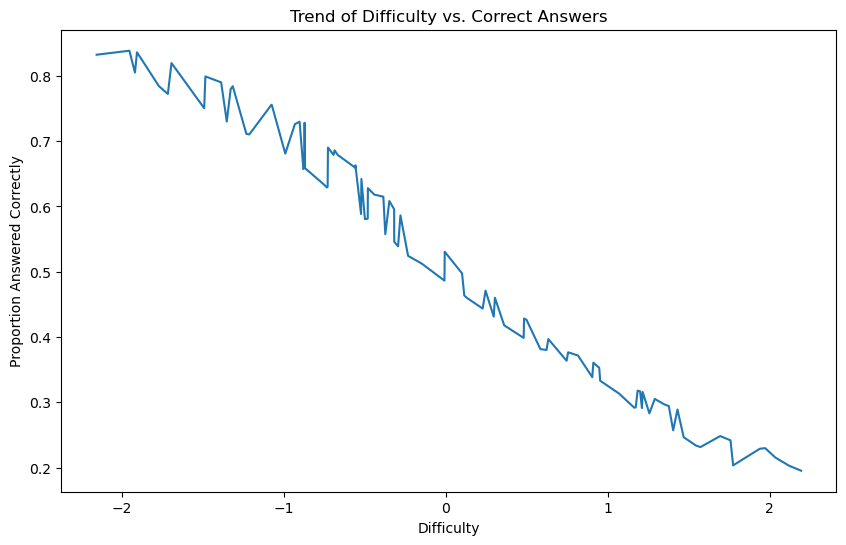

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


combined_data['answered_correctly'] = combined_data['answered_correctly'].astype(int)

print(combined_data[['ability','difficulty','answered_correctly']].describe())

# Group by difficulty and calculate the average correct answer rate
difficulty_vs_correctness = combined_data.groupby('difficulty')['answered_correctly'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=difficulty_vs_correctness, x='difficulty', y='answered_correctly')
plt.title('Trend of Difficulty vs. Correct Answers')
plt.xlabel('Difficulty')
plt.ylabel('Proportion Answered Correctly')
plt.show()


# Step 2: Relationship Between Ability and Performance
We’ll calculate the proportion of correct answers for different ability levels to see if higher ability correlates with higher performance.

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


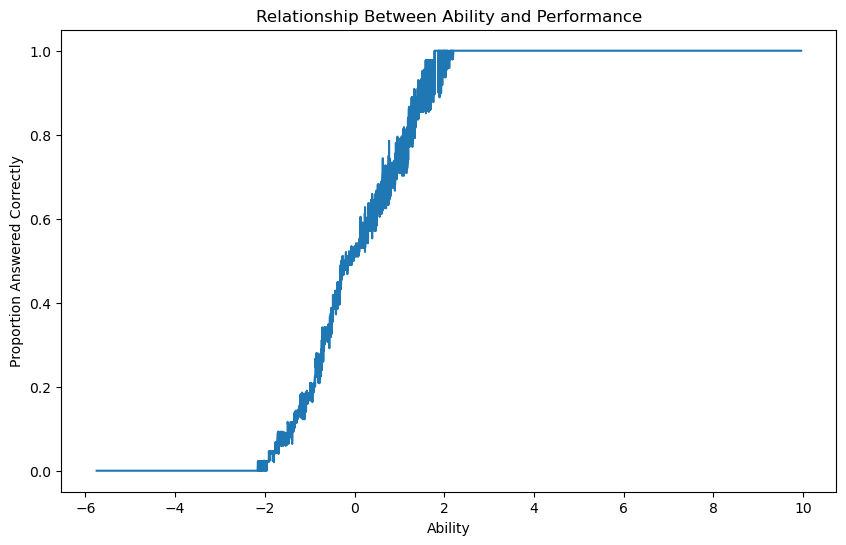

In [16]:
# Group by ability levels and calculate the average correct answer rate
ability_vs_performance = combined_data.groupby('ability')['answered_correctly'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=ability_vs_performance, x='ability', y='answered_correctly')
plt.title('Relationship Between Ability and Performance')
plt.xlabel('Ability')
plt.ylabel('Proportion Answered Correctly')
plt.show()


# Step 3: Heatmap of Ability vs. Difficulty vs. Correctness
To visualize how ability and difficulty together influence correctness, you can create a heatmap.

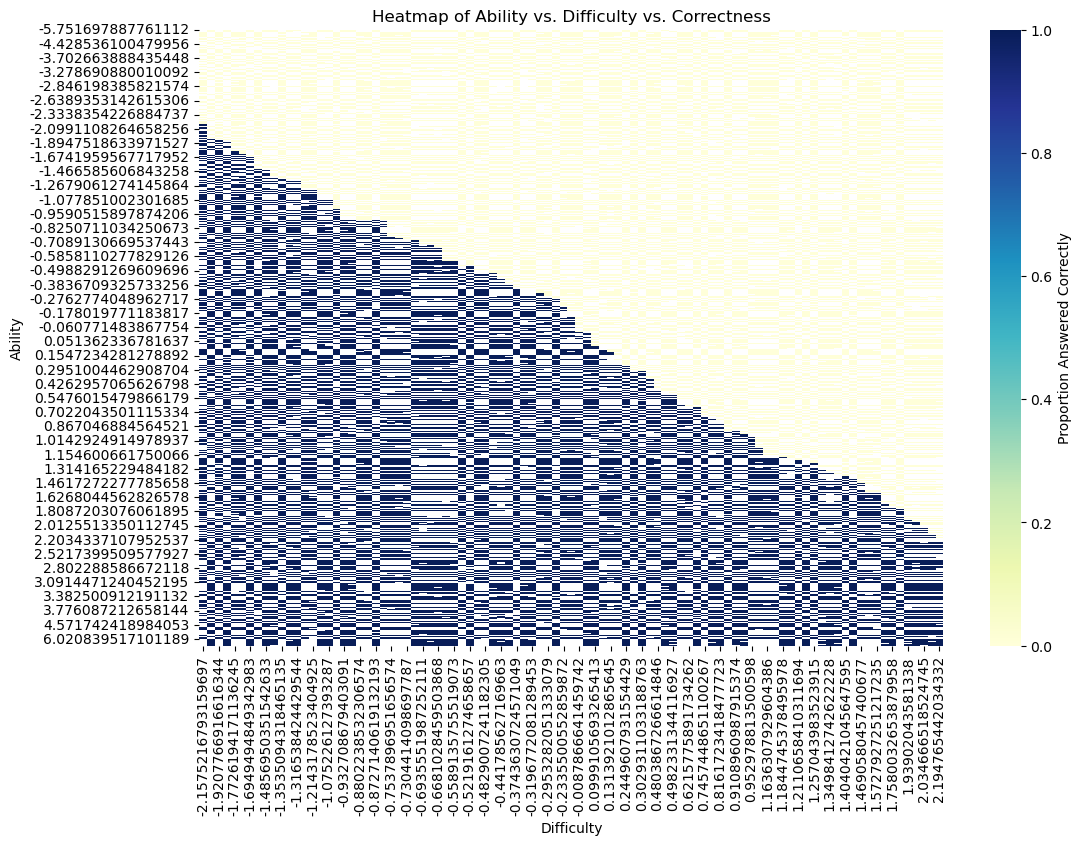

In [17]:
# Create a pivot table to calculate the mean correct answer rate for each ability and difficulty combination
heatmap_data = combined_data.pivot_table(
    values='answered_correctly', 
    index='ability', 
    columns='difficulty', 
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Proportion Answered Correctly'})
plt.title('Heatmap of Ability vs. Difficulty vs. Correctness')
plt.xlabel('Difficulty')
plt.ylabel('Ability')
plt.show()
